# Warehouse Productivity assessment
*This notebook illustrates how to assess the productivity of a storage system.  
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from logproj.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH2,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH1,AREA 1,2,0,0,1200,0,0,1
0,1,FAKE,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH1,AREA 1,4,0,0,3600,0,0,3
0,1,FAKE,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,51.959368,9.763340
0,1,PRODOTTO_1,79.450254,2.519108
0,2,PRODOTTO_2,22.773591,8.158901
0,3,PRODOTTO_3,87.590017,9.464872
0,4,PRODOTTO_4,60.305711,1.564300


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,45,1,LOGICAL_WH1,AREA 1,892,2,46,1,8000,36800,1200,50,50,46.836281,3169.707478,175.016036,2020-01-02 00:21:06.729762,-,PUTAWAY
0,75,1,FAKE,AREA 1,738,2,15,2,8000,12000,2400,72,72,2.354494,160.395220,11.128006,2020-01-02 00:46:37.131809,-,PUTAWAY
0,50,1,LOGICAL_WH2,AREA 1,73,0,14,2,0,11200,2400,650,650,19.946383,1201.782817,16.882489,2020-01-02 01:58:29.678041,-,PICKING
0,82,1,FAKE,AREA 1,1387,4,13,1,16000,10400,1200,251,251,10.558681,1016.005940,29.105521,2020-01-02 03:16:05.288356,,OTHER
0,64,1,FAKE,AREA 1,41,0,8,0,0,6400,0,741,741,4.591217,10.015078,44.122619,2020-01-02 04:26:33.442814,+,PUTAWAY


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH1,0,825,5.235136,2020-01-02
0,1,LOGICAL_WH1,1,1537,16.141858,2020-01-02
0,1,FAKE,2,188,2.317063,2020-01-02
0,1,LOGICAL_WH1,3,815,12.480639,2020-01-02
0,1,FAKE,4,856,2.769756,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, path_results = creaCartella(root_path,f"P8_warehouseAssessment")

Cartella TOY_DATA_results già esistente
Cartella P8_warehouseAssessment già esistente


### Set columns name

In [9]:
# %% SET COLUMNS MOVEMENTS
timecolumn_mov='TIMESTAMP_IN'
itemcodeColumns_mov='ITEMCODE'
inout_column_mov = 'INOUT'
x_col_mov = 'LOCCODEX'
y_col_mov = 'LOCCODEY'
z_col_mov = 'LOCCODEZ'

In [10]:
# %% SET COLUMNS SKUS
itemcodeColumns_sku='ITEMCODE'

In [11]:
# %% SET COLUMNS INVENTORY
itemcodeColumns_inv = 'ITEMCODE'

### Preprocess data

In [12]:
# %% convert to datetime
from logproj.stat_time_series import sampleTimeSeries
sampling_interval = 'year' # set sampling interval

D_movements['PERIOD'] = pd.to_datetime(D_movements[timecolumn_mov])
D_movements['PERIOD'] = sampleTimeSeries(D_movements['PERIOD'],sampleInterval=sampling_interval)

### Space productivity

Cartella popularity_productivity già esistente
Cartella QUANTITY_productivity già esistente
Cartella VOLUME_productivity già esistente
Cartella WEIGHT_productivity già esistente


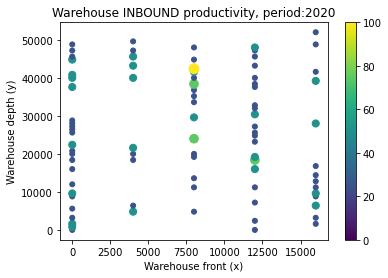

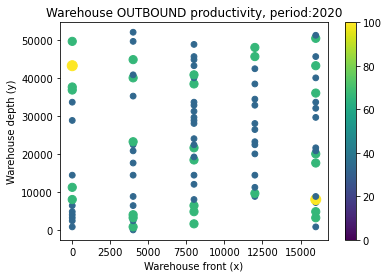

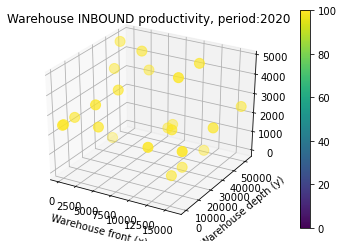

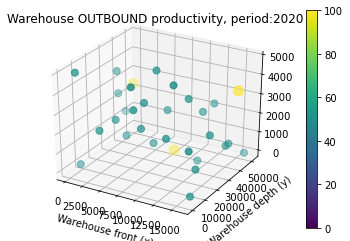

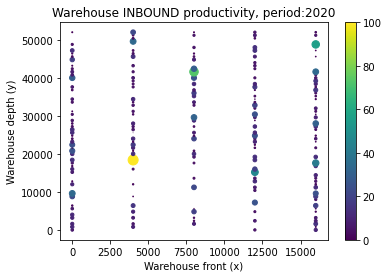

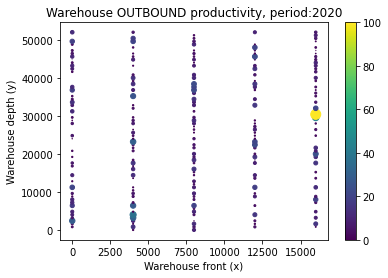

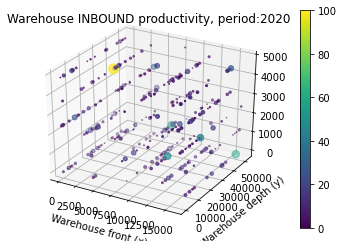

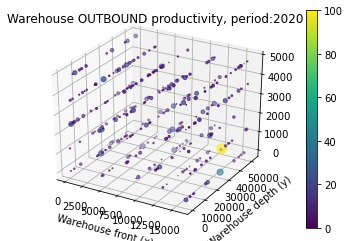

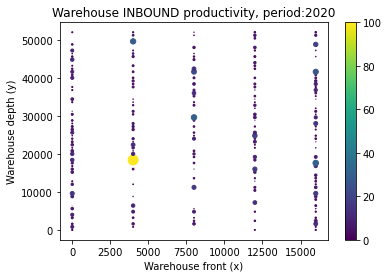

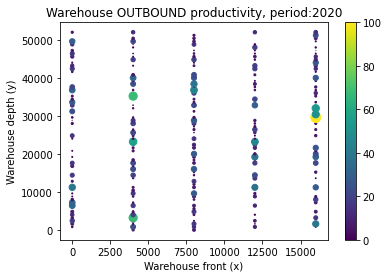

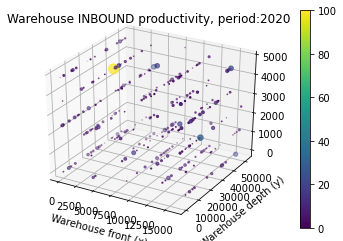

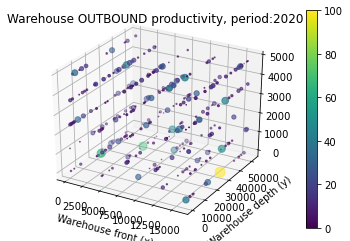

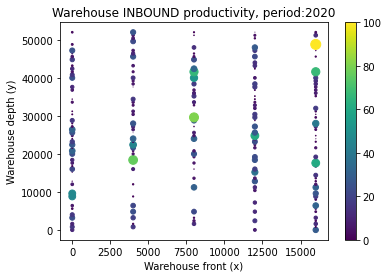

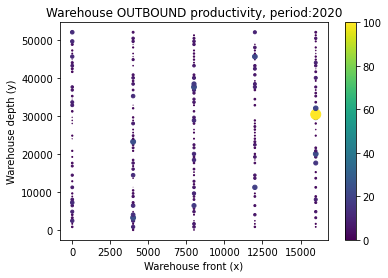

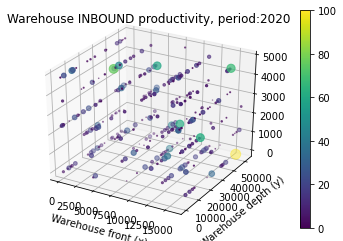

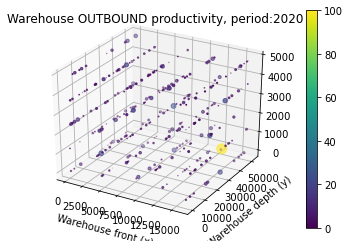

In [13]:
# %% assess productivity
from logproj.P8_performanceAssessment.wh_productivity_assessment import spaceProductivity

for variableToPlot in ['popularity','QUANTITY','VOLUME','WEIGHT']:
    _, path_current = creaCartella(path_results,f"{variableToPlot}_productivity")
    
    fig_out_2D = spaceProductivity(D_movements,variableToPlot,inout_column_mov, x_col_mov,  y_col_mov, z_col_mov, graphType='2D',cleanData = False)
    fig_out_3D = spaceProductivity(D_movements,variableToPlot,inout_column_mov, x_col_mov,  y_col_mov, z_col_mov, graphType='3D',cleanData = False)
    
    
    #save figure
    for key in fig_out_2D.keys():
        fig_out_2D[key].savefig(path_current+f"\\{key}.png")  
    for key in fig_out_3D.keys():
        fig_out_3D[key].savefig(path_current+f"\\{key}.png") 

### Time productivity

Cartella popularity_productivity già esistente
Cartella QUANTITY_productivity già esistente
Cartella VOLUME_productivity già esistente
Cartella WEIGHT_productivity già esistente


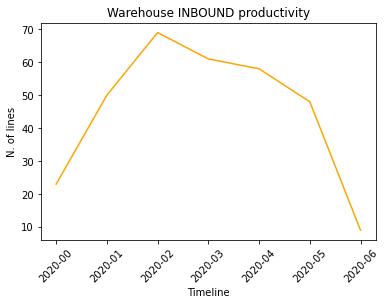

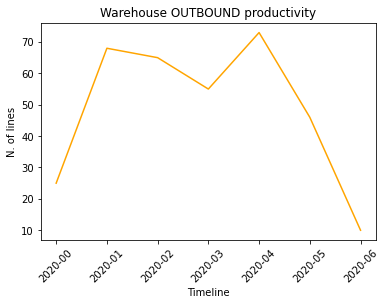

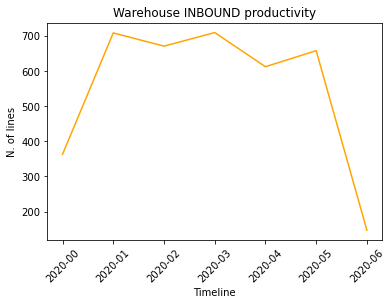

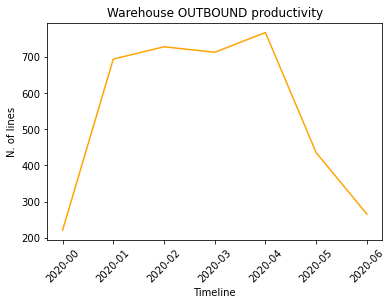

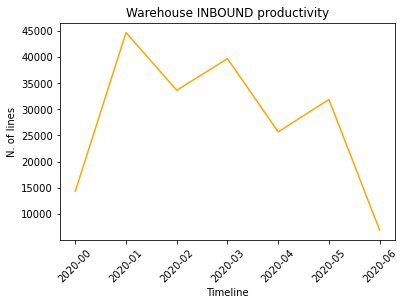

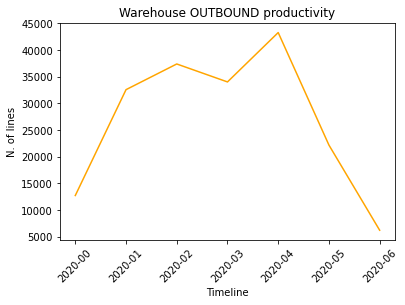

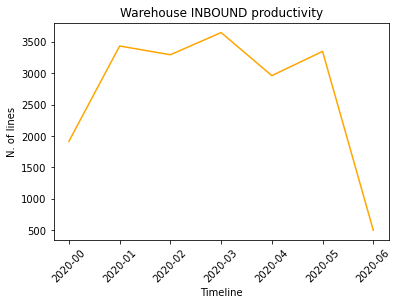

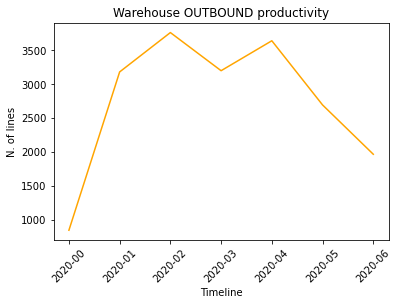

In [14]:
#resample to week
sampling_interval = 'week' # set sampling interval

D_movements['PERIOD'] = pd.to_datetime(D_movements[timecolumn_mov])
D_movements['PERIOD'] = sampleTimeSeries(D_movements['PERIOD'],sampleInterval=sampling_interval)



# %% 1D (trend) productivity plot
from logproj.P8_performanceAssessment.wh_productivity_assessment import timeProductivity

for variableToPlot in ['popularity','QUANTITY','VOLUME','WEIGHT']:
    _, path_current = creaCartella(path_results,f"{variableToPlot}_productivity")

    fig_out_trend = timeProductivity(D_movements, variableToPlot, inout_column_mov)
    
    #save figure
    for key in fig_out_trend.keys():
        fig_out_trend[key].savefig(path_current+f"\\{key}.png")  